In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json

# Load Data Pada CSV dan Proses menjadi Data Time Series

In [7]:
#Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_PARKIR.csv')
df['tahun'] = pd.to_datetime(df['tahun_bulan'])
df.head()

,tahun_bulan,jml_setor,tahun
0,2012-1,34906900,2012-01-01
1,2012-2,39445700,2012-02-01
2,2012-3,41175975,2012-03-01
3,2012-4,45978725,2012-04-01
4,2012-5,45074425,2012-05-01


In [8]:
#Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.head()
json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/parkir.json', 'w') as f:
    json.dump(json_data, f) 

{"2012-01-01T00:00:00.000":34906900,"2012-02-01T00:00:00.000":39445700,"2012-03-01T00:00:00.000":41175975,"2012-04-01T00:00:00.000":45978725,"2012-05-01T00:00:00.000":45074425,"2012-06-01T00:00:00.000":54744050,"2012-07-01T00:00:00.000":48090375,"2012-08-01T00:00:00.000":52337050,"2012-09-01T00:00:00.000":73461000,"2012-10-01T00:00:00.000":43321125,"2012-11-01T00:00:00.000":42256375,"2012-12-01T00:00:00.000":39102625,"2013-01-01T00:00:00.000":49036625,"2013-02-01T00:00:00.000":48724000,"2013-03-01T00:00:00.000":46523125,"2013-04-01T00:00:00.000":56869250,"2013-05-01T00:00:00.000":54899875,"2013-06-01T00:00:00.000":55823500,"2013-07-01T00:00:00.000":63048000,"2013-08-01T00:00:00.000":81095000,"2013-09-01T00:00:00.000":75756625,"2013-10-01T00:00:00.000":57481750,"2013-11-01T00:00:00.000":56840250,"2013-12-01T00:00:00.000":56187000,"2014-01-01T00:00:00.000":66278500,"2014-02-01T00:00:00.000":62643750,"2014-03-01T00:00:00.000":62924875,"2014-04-01T00:00:00.000":69847125,"2014-05-01T00:00:0

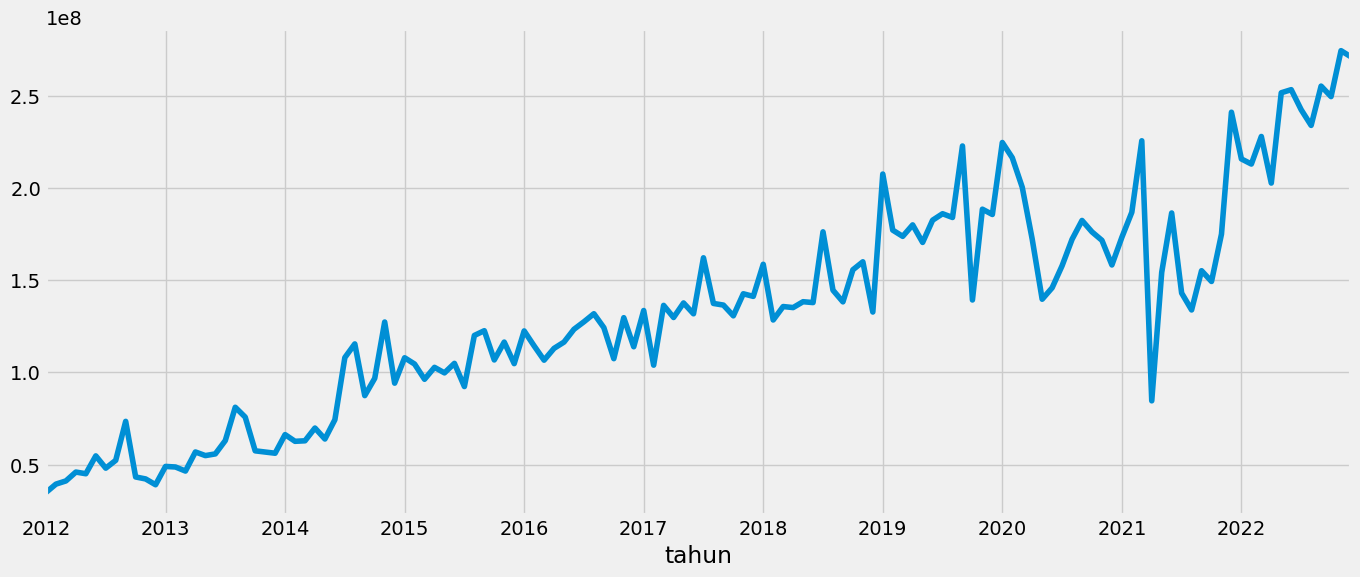

In [9]:
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.plot(figsize=(15, 6))
plt.show()

# Mencari parameter terbaik ARIMA p, d, q

In [10]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 5
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
best_result = [0, 0, 10000000]
p_params = [0, 1, 2, 3]
d_params = [0, 1, 2]
q_params = [0, 1, 2, 3]
P_params = [0, 1, 2, 3]
D_params = [0, 1, 2]
Q_params = [0, 1, 2, 3]
for p in p_params:
    for d in d_params:
        for q in q_params:
            for P in P_params:
                for D in D_params:
                    for Q in Q_params:
                        param = [p, d, q]
                        param_seasonal = [P, D, Q, 12]
                        try:
                            mod = sm.tsa.statespace.SARIMAX(dts, order=param, seasonal_order=param_seasonal)
                            results = mod.fit()
                            if results.aic < best_result[2]:
                                if results.aic > 300:
                                    best_result = [param, param_seasonal, results.aic]
                                    print('Best Result:', best_result)
                        except:
                            continue
print('\nBest Result:', best_result)

Best Result: [[0, 0, 0], [0, 0, 0, 12], 5338.566294471785]
Best Result: [[0, 0, 0], [0, 0, 1, 12], 5293.851636410545]
Best Result: [[0, 0, 0], [0, 0, 3, 12], 5279.110387465695]
Best Result: [[0, 0, 0], [0, 1, 0, 12], 4531.829644062896]
Best Result: [[0, 0, 0], [0, 2, 0, 12], 4144.795115299599]
Best Result: [[0, 0, 0], [0, 2, 1, 12], 4099.146859905952]
Best Result: [[0, 0, 0], [0, 2, 3, 12], 4085.6352774024945]
Best Result: [[0, 0, 0], [2, 2, 0, 12], 4073.17044413347]
Best Result: [[0, 0, 0], [2, 2, 1, 12], 4060.943802872969]
Best Result: [[0, 0, 0], [3, 2, 0, 12], 4060.684476814736]
Best Result: [[0, 0, 0], [3, 2, 1, 12], 4050.7590007485173]
Best Result: [[0, 1, 0], [0, 2, 3, 12], 4047.862655424703]
Best Result: [[0, 1, 0], [1, 2, 1, 12], 4026.5056152685897]
Best Result: [[0, 1, 0], [2, 2, 1, 12], 4021.076855449041]
Best Result: [[0, 1, 0], [3, 2, 0, 12], 4006.6829398360883]
Best Result: [[0, 1, 0], [3, 2, 1, 12], 4002.0176765649044]
Best Result: [[3, 2, 2], [0, 2, 2, 12], 3998.8870396

In [7]:
 #order=(1, 0, 0),
  #                          seasonal_order=(0, 0, 0, 12),
  #                          enforce_stationarity=False,
    #                        enforce_invertibility=False)

# Plot model diagnostics

In [12]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(dts,order=(3, 2, 2),seasonal_order=(0, 2, 2, 12),
                            enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 2, 2)x(0, 2, 2, 12)   Log Likelihood               -1483.738
Date:                            Sat, 01 Apr 2023   AIC                           2983.477
Time:                                    10:00:29   BIC                           3002.433
Sample:                                01-01-2012   HQIC                          2991.071
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5081      0.314     -4.797      0.000      -2.124      -0.892
ar.L2         -0.9390      0.547   

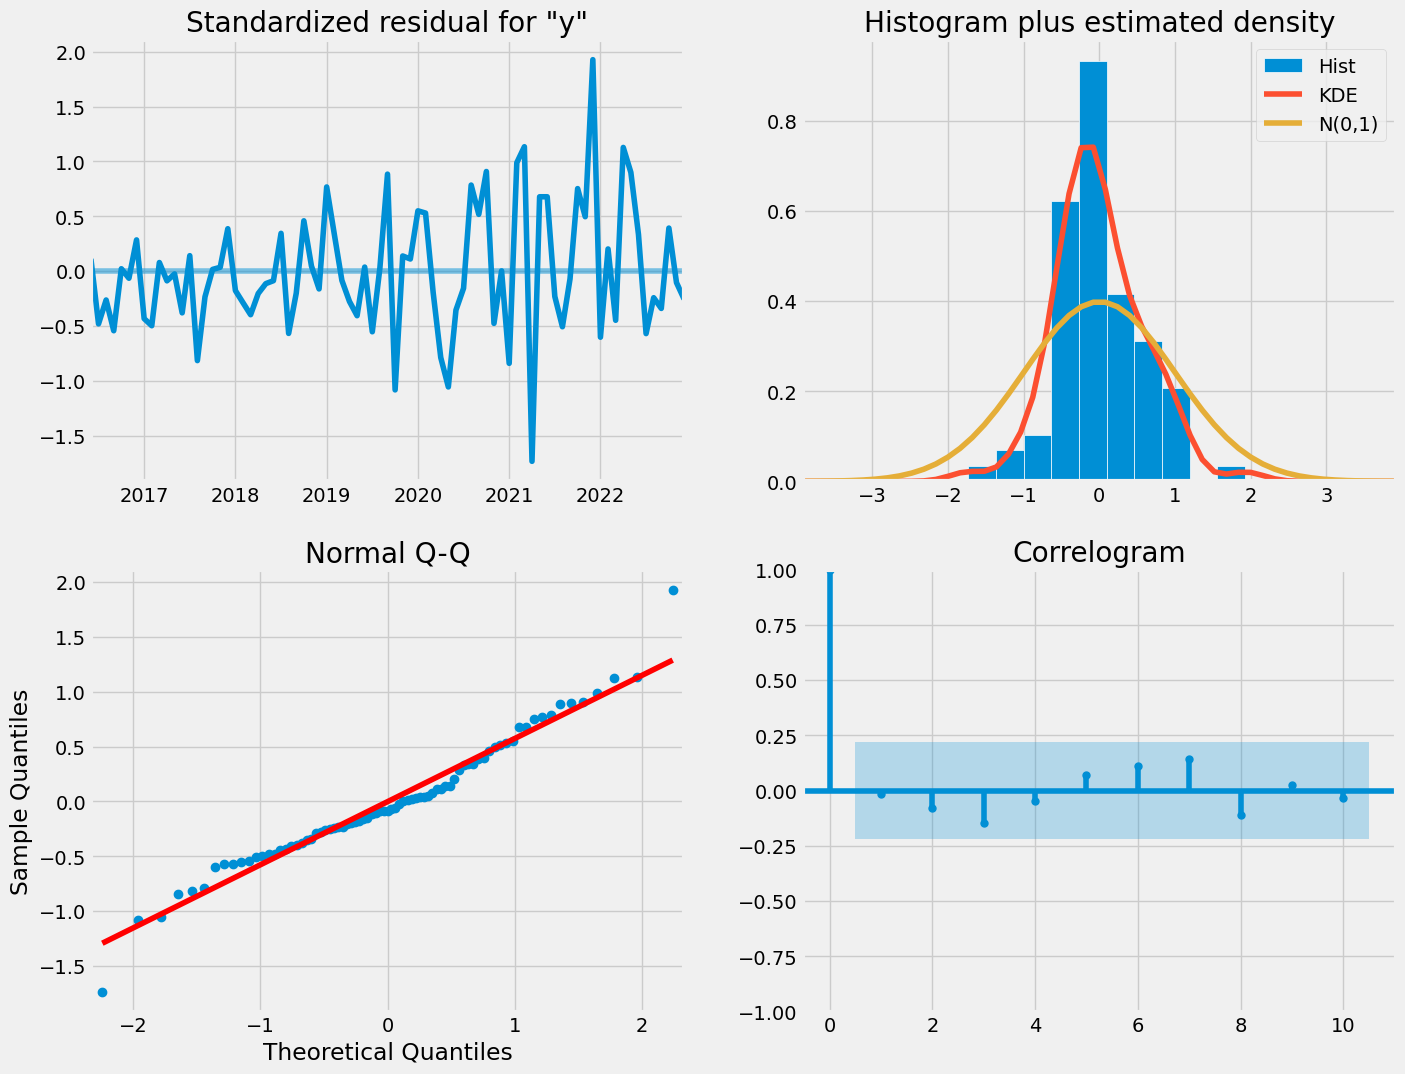

In [14]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

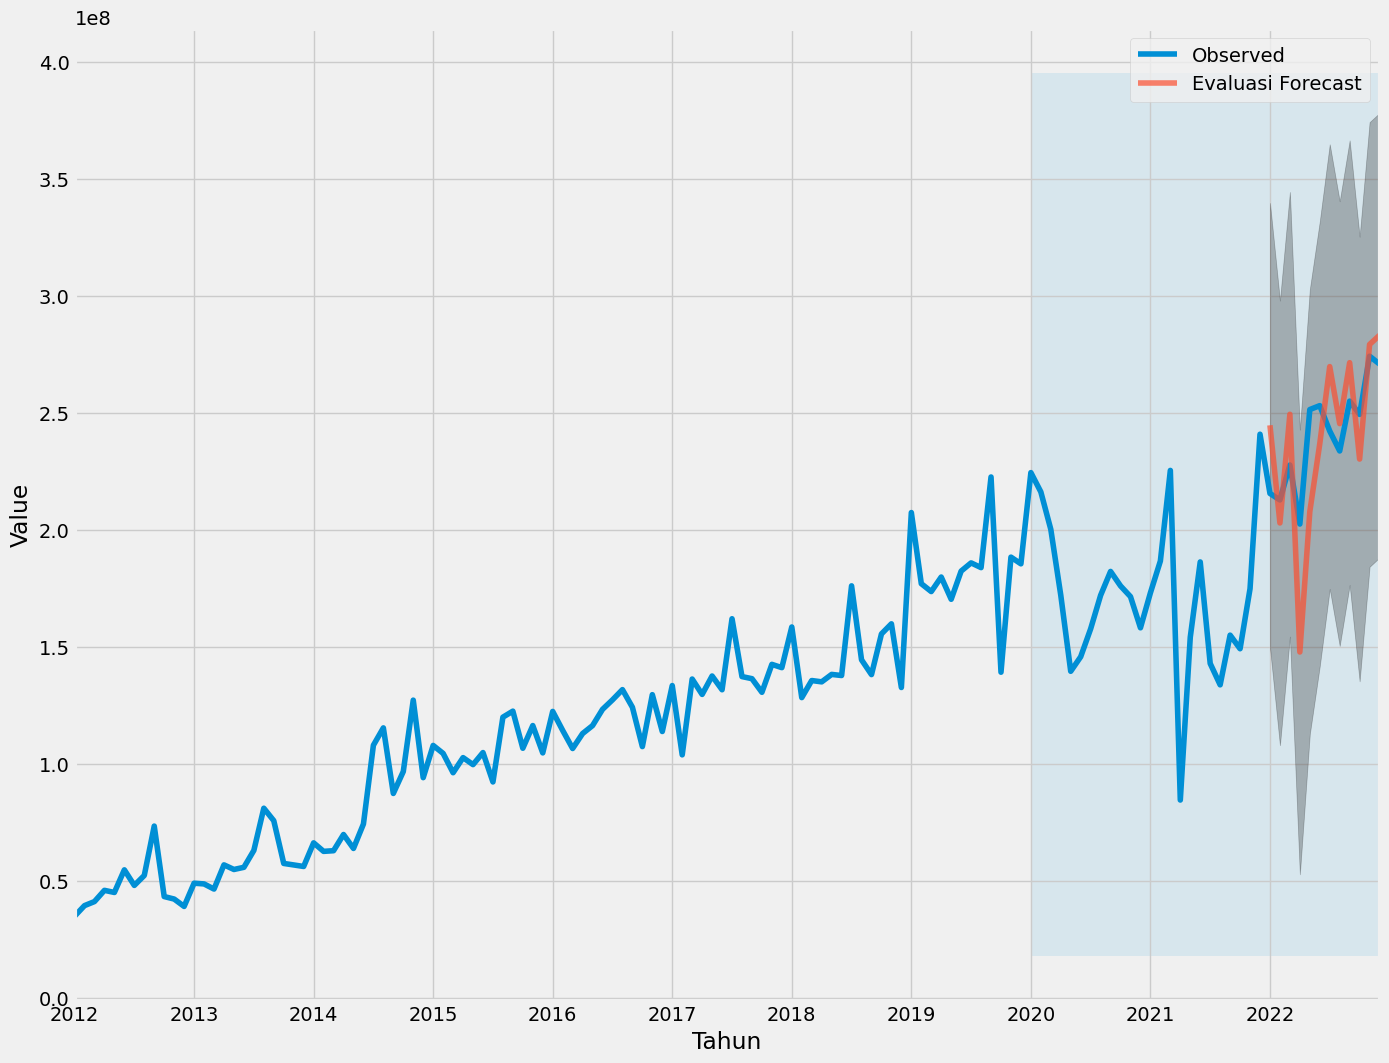

{"2022-01-01T00:00:00.000":244821902.3365174234,"2022-02-01T00:00:00.000":203057982.3675706089,"2022-03-01T00:00:00.000":249522518.6830276847,"2022-04-01T00:00:00.000":147881881.0866539776,"2022-05-01T00:00:00.000":207882027.7921007872,"2022-06-01T00:00:00.000":236938668.0402905941,"2022-07-01T00:00:00.000":269913140.2806340456,"2022-08-01T00:00:00.000":245529111.6392199695,"2022-09-01T00:00:00.000":271590620.803162992,"2022-10-01T00:00:00.000":230377767.0528356433,"2022-11-01T00:00:00.000":279379928.6108629107,"2022-12-01T00:00:00.000":283316854.9424228668}


In [17]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dts['2012':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='Evaluasi Forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), dts.index[-1],alpha=.1, zorder=-1)
ax.set_xlabel('Tahun')
ax.set_ylabel('Value')
plt.legend()
plt.show()

json_data = pred.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/parkir_predicted_ahead.json', 'w') as f:
    json.dump(json_data, f)

In [18]:
df_test = df[df.tahun.between('2022-01', '2022-12')]
dts_test = pd.Series(data=df_test['jml_setor'].values, index=df_test['tahun'])
y_test, pred_ahead = np.array(dts_test), np.array(pred.predicted_mean)
list_ape = []
for index, elem in np.ndenumerate(pred_ahead):
    ape = np.abs(elem-y_test[index]) / y_test[index]
    list_ape.append(ape*100)
mape = np.mean(list_ape)
print(y_test)
print(pred.predicted_mean.to_json(date_format='iso'))
print(list_ape)
print(mape)

[215673000 212900935 227849064 202591436 251542760 253218988 242349000
 233843870 255154150 249460960 274352000 271004000]
{"2022-01-01T00:00:00.000":244821902.3365174234,"2022-02-01T00:00:00.000":203057982.3675706089,"2022-03-01T00:00:00.000":249522518.6830276847,"2022-04-01T00:00:00.000":147881881.0866539776,"2022-05-01T00:00:00.000":207882027.7921007872,"2022-06-01T00:00:00.000":236938668.0402905941,"2022-07-01T00:00:00.000":269913140.2806340456,"2022-08-01T00:00:00.000":245529111.6392199695,"2022-09-01T00:00:00.000":271590620.803162992,"2022-10-01T00:00:00.000":230377767.0528356433,"2022-11-01T00:00:00.000":279379928.6108629107,"2022-12-01T00:00:00.000":283316854.9424228668}
[13.515322889985034, 4.623254769843727, 9.512198252009359, 27.004870488872008, 17.357181024768597, 6.429344058396366, 11.373737989690094, 4.997027135763691, 6.4417807051788065, 7.6497713097730236, 1.8326560808242371, 4.543421847066046]
9.606713879347582


# Prediksi data selama 2 tahun

In [29]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=24, dynamic=False)
# Dapatkan interval
pred_ci = pred_uc.conf_int()


json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/parkir_predicted.json', 'w') as f:
    json.dump(json_data, f) 

{"2022-01-01T00:00:00.000":236242641.713301003,"2022-02-01T00:00:00.000":252500804.3703357279,"2022-03-01T00:00:00.000":259306199.1608420014,"2022-04-01T00:00:00.000":175054898.6975184977,"2022-05-01T00:00:00.000":194465514.8093449473,"2022-06-01T00:00:00.000":214556752.9300398827,"2022-07-01T00:00:00.000":197633164.070204854,"2022-08-01T00:00:00.000":199870808.0562958717,"2022-09-01T00:00:00.000":215782331.4840854406,"2022-10-01T00:00:00.000":209790578.6180105805,"2022-11-01T00:00:00.000":220881410.8255078793,"2022-12-01T00:00:00.000":248696982.6893812418,"2023-01-01T00:00:00.000":253440616.9955942035,"2023-02-01T00:00:00.000":268419333.9594838917,"2023-03-01T00:00:00.000":290601954.2893399,"2023-04-01T00:00:00.000":179045047.7505190074,"2023-05-01T00:00:00.000":222640748.5882130861,"2023-06-01T00:00:00.000":248563015.5820146203,"2023-07-01T00:00:00.000":218876231.8388380706,"2023-08-01T00:00:00.000":215633094.5883835852,"2023-09-01T00:00:00.000":234121947.7595428824,"2023-10-01T00:00

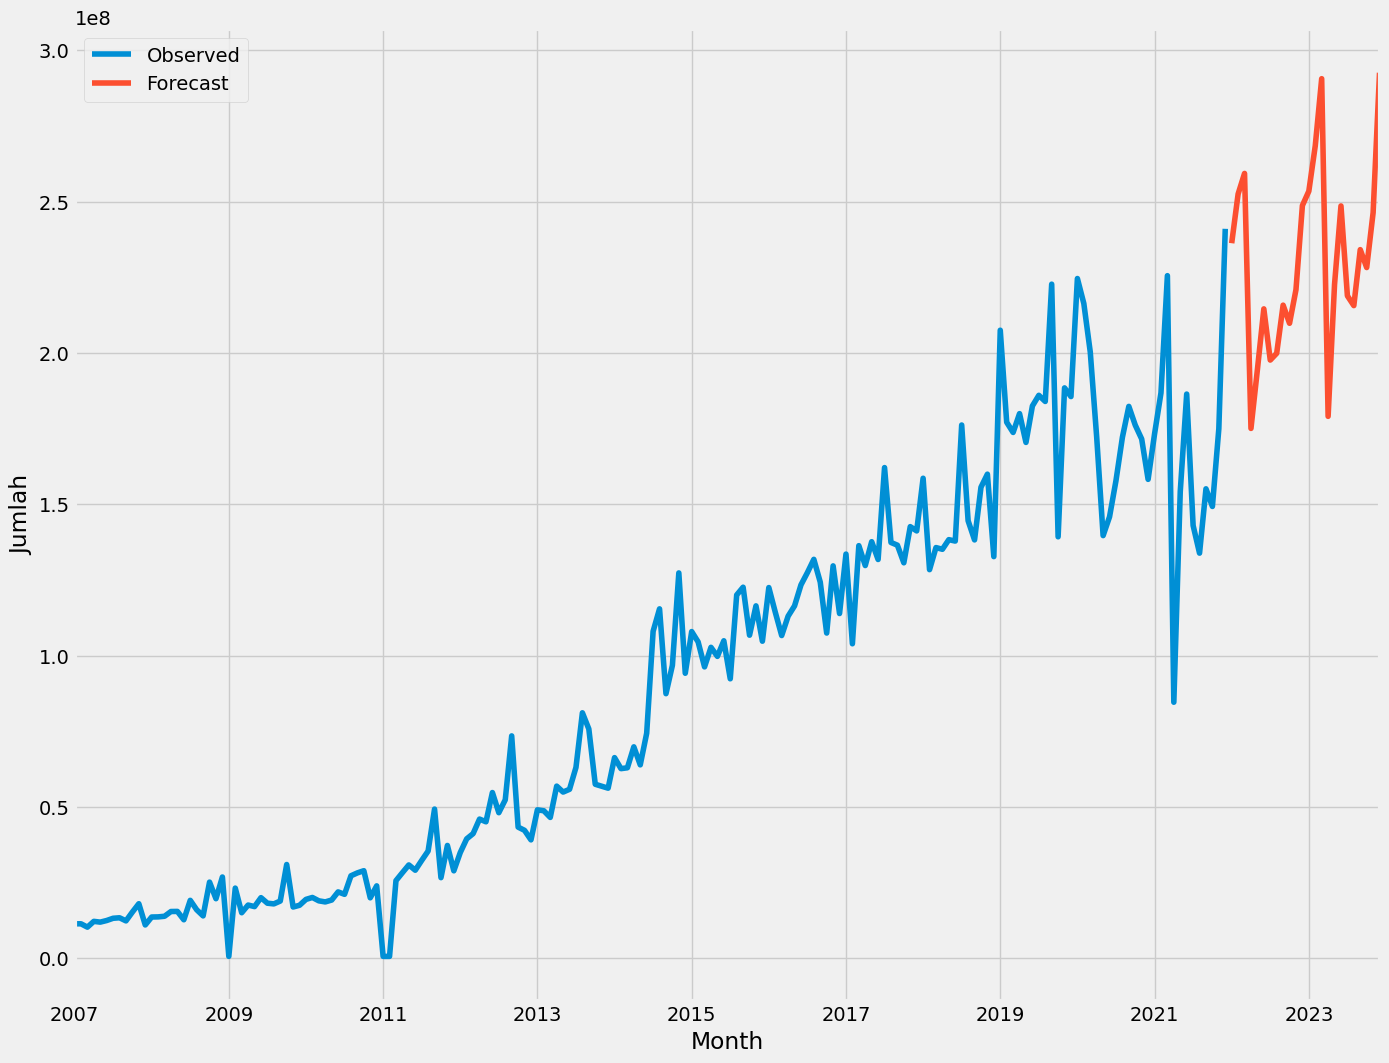

In [30]:
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Month')
ax.set_ylabel('Jumlah')
plt.legend()
plt.show()